#### SVM Classification

In [31]:
import numpy as np
import cupy as cp
from cuml import SVC
from cuml import train_test_split
import cudf

In [64]:
#Load data from generated numpy files
X = cp.load('feat.npy') # list of features
y = cp.load('label.npy') # labels are the target

In [65]:
#Read audio classes directories
import os
import glob
audio_subdirectories = os.listdir("modified-data-2/") #Path to data folder.
audio_subdirectories.sort()
print('Audio Subdirs: ', audio_subdirectories)
parent_dir = "modified-data-2"
names = []
for label, sub_dir in enumerate(audio_subdirectories): ##The enumerate() function adds a counter to an iterable.
    for file_name in glob.glob(os.path.join(parent_dir, sub_dir, "*.mp3")): ##parent is data, sub_dirs are the classes
        # print("Actual File Name: ", file_name)
        names.append(file_name)
# print(names[437])

Audio Subdirs:  ['001-Low', '002-Intermediate', '003-High']


In [81]:
files_to_extract = ["modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 1 - Woman.mp3"]
for num in [2, 3, 4, 5, 9, 14, 18, 19, 23, 26, 29]:
  files_to_extract.append(f"modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment {num} - W.mp3")
indices = []
for extract in files_to_extract:
    indices.append(names.index(extract))
print(indices)

[426, 430, 434, 435, 436, 437, 427, 428, 429, 431, 432, 433]


In [77]:
vals = []
valsout = []
arr = X.get()
arrout = y.get()
for i in range(arr.shape[0]):
    if i not in indices:
        vals.append(arr[i])
        valsout.append(arrout[i])
newX = cp.array(vals)
print(newX.shape)
newY = cp.array(valsout)
print(newY.shape)

(1412, 23)
(1412,)


In [82]:
xx = 0
for ind in indices:
    print(files_to_extract[xx])
    xx += 1
    vals = []
    valsout = []
    arr = X.get()
    arrout = y.get()
    for i in range(arr.shape[0]):
        if i != ind:
            vals.append(arr[i])
            valsout.append(arrout[i])
    newX = cp.array(vals)
    print(newX.shape)
    newY = cp.array(valsout)
    print(newY.shape)

    np.random.seed(7)

    # Load the data
    X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.3, random_state=30)

    # SVM classifier
    svm_clf = SVC(C=200, gamma = 0.0001, kernel='rbf')
    #svm_clf = LinearSVC(random_state=42) # HandsOn git

    # Fit model
    svm_clf.fit(X_train, y_train) #From Beif github

    print("Pred: ", svm_clf.predict(X[ind].reshape(1, -1)))

modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 1 - Woman.mp3
(1423, 23)
(1423,)
Pred:  [0]
modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 2 - W.mp3
(1423, 23)
(1423,)
Pred:  [1]
modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 3 - W.mp3
(1423, 23)
(1423,)
Pred:  [0]
modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 4 - W.mp3
(1423, 23)
(1423,)
Pred:  [0]
modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 5 - W.mp3
(1423, 23)
(1423,)
Pred:  [1]
modified-data-2/001-Low/Luis Suarez interview in English after being awarded November player of the month segment 9 - W.mp3
(1423, 23)
(1423,)
Pred:  [1]
modified-data-2/001-Low/Luis Suarez interview in English after being awa

In [73]:
# Fix random seed number
np.random.seed(7)

# Load the data
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.3, random_state=30)

# SVM classifier
svm_clf = SVC(C=200, gamma = 0.0001, kernel='rbf')
#svm_clf = LinearSVC(random_state=42) # HandsOn git

# Fit model
svm_clf.fit(X_train, y_train) #From Beif github

# Predictions
y_predict = svm_clf.predict(X_test)

# Accuracy Result
acc = svm_clf.score(X_test, y_test)
print("Final accuracy = %0.4f" %acc)
#print('\n')
#print(classification_report(y_test, y_predict))

Final accuracy = 0.9225


array([1])

##### Compute Confussion Matrix

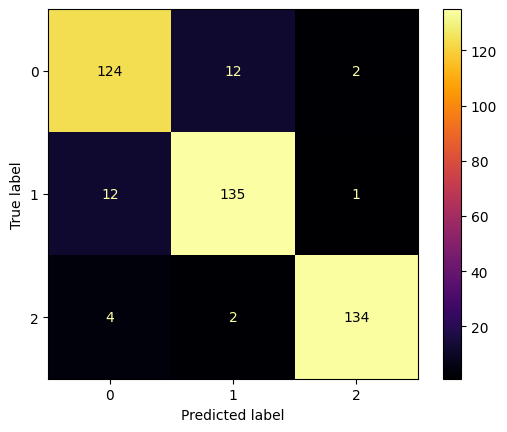

In [75]:
# # Label integer encoding
# label_classes = cp.array(['Low','Intermediate','High'])
# #print(label_classes)
#
# # De-encoding predicted and actual classes (going from numeric to written)
# prediction_decoded = label_classes[y_predict]
# actual_value_decoded = label_classes
from cuml.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Compute confusion matrix
cm = confusion_matrix(y_test, y_predict).get()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap="inferno")

In [34]:
X_train.shape

(997, 23)

In [36]:
from cuml import KNeighborsClassifier
mx = 0
for k in range(1, 80):
    # SVM classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn = LinearSVC(random_state=42) # HandsOn git

    # Fit model
    knn.fit(X_train, y_train) #From Beif github

    # Predictions
    y_predict = knn.predict(X_test)

    # Accuracy Result
    acc = knn.score(X_test, y_test)
    if acc > mx:
        print(f"\033[92mk={k} accuracy = {round(acc,4)}\033[0m")
        mx = acc
    else:
        print(f"k={k} accuracy = {round(acc,4)}")

k=1 accuracy = 0.8642
k=2 accuracy = 0.8525
k=3 accuracy = 0.8759
k=4 accuracy = 0.8642
k=5 accuracy = 0.8759
k=6 accuracy = 0.8548
k=7 accuracy = 0.8689
k=8 accuracy = 0.8595
k=9 accuracy = 0.8642
k=10 accuracy = 0.8501
k=11 accuracy = 0.8478
k=12 accuracy = 0.8361
k=13 accuracy = 0.8501
k=14 accuracy = 0.8407
k=15 accuracy = 0.8478
k=16 accuracy = 0.8384
k=17 accuracy = 0.8337
k=18 accuracy = 0.8244
k=19 accuracy = 0.8314
k=20 accuracy = 0.829
k=21 accuracy = 0.8244
k=22 accuracy = 0.8197
k=23 accuracy = 0.8126
k=24 accuracy = 0.8173
k=25 accuracy = 0.8056
k=26 accuracy = 0.808
k=27 accuracy = 0.8103
k=28 accuracy = 0.815
k=29 accuracy = 0.8126
k=30 accuracy = 0.8103
k=31 accuracy = 0.8173
k=32 accuracy = 0.8009
k=33 accuracy = 0.8126
k=34 accuracy = 0.8056
k=35 accuracy = 0.815
k=36 accuracy = 0.815
k=37 accuracy = 0.8197
k=38 accuracy = 0.8033
k=39 accuracy = 0.8103
k=40 accuracy = 0.8056
k=41 accuracy = 0.8056
k=42 accuracy = 0.8009
k=43 accuracy = 0.8056
k=44 accuracy = 0.8056
k=